In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pickle

In [52]:
df_prod = pd.read_csv('RC_PRODUCTION_clean.csv')
df_defects = pd.read_csv('RC_DEFECTS_clean.csv')
df_prod_2 = df_prod.copy()

In [53]:
df_prod

,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.408750,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299379,6838679,2019-04-19,847.0,10:58:47.860,11.190825,1265.231250,1291.387500,1296.315000,1296.337500,1310.388750,...,530.069625,16.875,16.875,3308.542500,NaN,NaN,NaN,NaN,NaN,NaN
299380,6838679,2019-04-19,854.0,10:59:32.800,11.192366,1266.986250,1291.353750,1300.792500,1298.981250,1311.997500,...,530.281125,16.875,16.875,3309.367500,NaN,NaN,NaN,NaN,NaN,NaN
299381,6838679,2019-04-19,861.0,11:00:17.800,11.202919,1269.641250,1292.490000,1299.408750,1301.377500,1313.730000,...,530.179875,16.875,16.875,3309.446250,NaN,NaN,NaN,NaN,NaN,NaN
299382,6838679,2019-04-19,868.0,11:00:47.800,11.196158,1270.995000,1294.871250,1304.043750,1303.335000,1315.323750,...,530.050500,16.875,16.875,3309.007500,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_defects

,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0.0,599.0,2019-03-01,0,0,1,0,0,0
1,389523,600.0,1457.0,2019-03-01,0,1,1,0,0,0
2,389528,0.0,1399.0,2019-03-01,0,0,1,0,0,0
3,389528,1400.0,1539.0,2019-03-01,0,0,1,0,1,0
4,389712,0.0,1374.0,2019-03-01,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
612,424313,0.0,1370.0,2019-05-16,0,0,1,0,0,0
613,424712,1.0,889.0,2019-05-16,0,0,1,1,0,0
614,424712,890.0,1059.0,2019-05-16,0,1,1,1,0,0
615,425612,0.0,2055.0,2019-05-16,0,0,1,1,0,0


In [55]:
df_prod_2['Compare'] = np.where(df_prod['MT'] == df_prod_2['MT'], 'True', 'False')
df_prod_2['Compare'].value_counts()

True    299384
Name: Compare, dtype: int64

In [56]:
# Solving inconsistency for the MT column, create a dictionary that shows where we had those inconsistencies
def fix_date(df):
    d = {}
    for i in range(len(df)-1):
        if df.iloc[i+1, 0] == df.iloc[i, 0] and df.iloc[i+1, 2] < df.iloc[i, 2] and df.iloc[i+1, 3] > df.iloc[i, 3]:
            df.iloc[i+1, 2] =  df.iloc[i, 2] + 7
            d.update({i+1 : df.iloc[i+1, 2]})
    return d

In [57]:
fix_date(df_prod_2)

{386: 1547.0,
 387: 1554.0,
 388: 1561.0,
 389: 1568.0,
 390: 1575.0,
 391: 1582.0,
 392: 1589.0,
 393: 1596.0,
 394: 1603.0,
 395: 1610.0,
 396: 1617.0,
 397: 1624.0,
 398: 1631.0,
 399: 1638.0,
 400: 1645.0,
 401: 1652.0,
 402: 1659.0,
 403: 1666.0,
 404: 1673.0,
 819: 238.0,
 820: 245.0,
 821: 252.0,
 822: 259.0,
 823: 266.0,
 824: 273.0,
 825: 280.0,
 826: 287.0,
 827: 294.0,
 828: 301.0,
 829: 308.0,
 830: 315.0,
 831: 322.0,
 832: 329.0,
 833: 336.0,
 834: 343.0,
 835: 350.0,
 836: 357.0,
 837: 364.0,
 838: 371.0,
 839: 378.0,
 840: 385.0,
 841: 392.0,
 842: 399.0,
 843: 406.0,
 844: 413.0,
 845: 420.0,
 846: 427.0,
 847: 434.0,
 848: 441.0,
 849: 448.0,
 850: 455.0,
 851: 462.0,
 852: 469.0,
 853: 476.0,
 854: 483.0,
 855: 490.0,
 856: 497.0,
 857: 504.0,
 858: 511.0,
 859: 518.0,
 860: 525.0,
 861: 532.0,
 862: 539.0,
 863: 546.0,
 864: 553.0,
 865: 560.0,
 866: 567.0,
 867: 574.0,
 868: 581.0,
 869: 588.0,
 870: 595.0,
 871: 602.0,
 872: 609.0,
 873: 616.0,
 874: 623.0,
 875: 

In [58]:
# Check values in dataframe where we didn't apply our function
print(df_prod.iloc[385,[0,2]])
print(df_prod.iloc[386,[0,2]])

COIL    243941
MT      1540.0
Name: 385, dtype: object
COIL    243941
MT         0.0
Name: 386, dtype: object


In [59]:
#Check values after we applied our function, it seems that the function works
print(df_prod_2.iloc[385,[0,2]])
print(df_prod_2.iloc[386,[0,2]])

COIL    243941
MT      1540.0
Name: 385, dtype: object
COIL    243941
MT      1547.0
Name: 386, dtype: object


In [60]:
# Check how many different values we have in the two dataframes after applying our function
df_prod_2['Compare'] = np.where(df_prod['MT'] == df_prod_2['MT'], 'True', 'False')
df_prod_2['Compare'].value_counts()

True     279828
False     19556
Name: Compare, dtype: int64

In [61]:
df_prod_2 = df_prod_2.drop('Compare', axis = 1)

In [62]:
# Merging defects and production dfs 
df = df_prod_2.merge(df_defects, on = 'COIL', how= 'left')

In [63]:
# FIll NaN values with 0 in DIF columns 
df[['DIF_TIPO_1','DIF_TIPO_2','DIF_TIPO_3','DIF_TIPO_4','DIF_TIPO_5','DIF_TIPO_6']] = df[['DIF_TIPO_1','DIF_TIPO_2','DIF_TIPO_3','DIF_TIPO_4','DIF_TIPO_5','DIF_TIPO_6']].fillna(value = 0)

In [64]:
df 

,COIL,DATE_x,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_y,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316707,6838679,2019-04-19,847.0,10:58:47.860,11.190825,1265.231250,1291.387500,1296.315000,1296.337500,1310.388750,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
316708,6838679,2019-04-19,854.0,10:59:32.800,11.192366,1266.986250,1291.353750,1300.792500,1298.981250,1311.997500,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
316709,6838679,2019-04-19,861.0,11:00:17.800,11.202919,1269.641250,1292.490000,1299.408750,1301.377500,1313.730000,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
316710,6838679,2019-04-19,868.0,11:00:47.800,11.196158,1270.995000,1294.871250,1304.043750,1303.335000,1315.323750,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Checking the proportion of Nan values in each column, only MT_FROM and MT_TO have a large amount of Nan values but we cannot drop them. 
df_na_sum = df.isna().sum()
na_proportion = df_na_sum / len(df)
na_proportion[na_proportion > 0]

PRES_ZONA1_MEASURED    0.050510
PRES_ZONA1_SET         0.050510
PRES_ZONA2_MEASURED    0.050510
PRES_ZONA2_SET         0.050510
PRES_ZONA3_MEASURED    0.050510
PRES_ZONA3_SET         0.050510
EXT_1                  0.050510
EXT_2                  0.050510
VENT_1                 0.050510
VENT_2                 0.050510
VENT_3                 0.050510
VENT_4                 0.050510
VENT_5                 0.050510
COOL_1A                0.050510
COOL_1B                0.050510
COOL_2A                0.050510
COOL_2B                0.050510
COOL_3                 0.050510
LS_COOLING             0.050510
LASER_RAFF_1           0.050510
LASER_RAFF_2           0.050510
LASER_RAFF_3           0.050510
LASER_RAFF_4           0.050510
LASER_RAFF_5           0.050510
LASER_RAFF_6           0.050510
LASER_RAFF_7           0.050510
LASER_RAFF_8           0.050510
LASER_RAFF_9           0.050510
TOUT_RAFF_H2O          0.050510
N_RAMPE_H2O            0.050510
ELET_TEMP              0.050898
ELET_H2S

In [66]:
df[df['MT_FROM'].isna() == False]

,COIL,DATE_x,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_y,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
4366,367736,2019-04-14,0.0,21:19:53.790,23.566950,1253.677500,1281.431250,1288.552500,1305.427500,1322.392500,...,NaN,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4367,367736,2019-04-14,7.0,21:20:23.790,23.565262,1253.981250,1281.363750,1289.767500,1305.686250,1322.820000,...,0.242885,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4368,367736,2019-04-14,14.0,21:20:38.790,23.570363,1254.041250,1281.416250,1289.902500,1305.390000,1322.370000,...,0.242953,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4369,367736,2019-04-14,21.0,21:20:53.790,23.545215,1254.132000,1281.147750,1289.331000,1305.294750,1322.237250,...,0.242980,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4370,367736,2019-04-14,28.0,21:21:23.790,23.549850,1254.476250,1281.172500,1289.610000,1305.483750,1321.998750,...,0.242981,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315052,426214,2019-05-16,259.0,07:21:44.920,33.662861,1271.495893,1271.751429,1276.934464,1282.914643,1316.637321,...,0.134993,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315053,426214,2019-05-16,266.0,07:21:59.920,33.675413,1271.646563,1271.894063,1276.796250,1282.696875,1316.241563,...,0.135018,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315054,426214,2019-05-16,273.0,07:22:14.920,33.660964,1271.880000,1272.413571,1277.079107,1282.522500,1315.804821,...,0.135011,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315055,426214,2019-05-16,280.0,07:22:29.920,33.654909,1272.411562,1273.900781,1278.691875,1283.173594,1316.393438,...,0.134990,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
# Dropping rows where MT is below MT_FROM or exceeds MT_TO
df = df.drop(df[(df.MT < df.MT_FROM) | (df.MT > df.MT_TO)].index)

In [68]:
df[df['COIL'] == 426214]

,COIL,DATE_x,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_y,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
315015,426214,2019-05-16,0.0,07:13:14.980,33.673500,1270.293750,1271.295000,1277.685000,1283.096250,1316.115000,...,NaN,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315016,426214,2019-05-16,7.0,07:13:29.980,33.674597,1270.749375,1271.098125,1277.317969,1283.197500,1316.610000,...,0.135186,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315017,426214,2019-05-16,14.0,07:13:44.980,33.690150,1270.946250,1270.428750,1277.111250,1283.433750,1316.610000,...,0.135022,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315018,426214,2019-05-16,21.0,07:13:59.980,33.649650,1271.160000,1269.990000,1276.638750,1283.377500,1316.846250,...,0.135079,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315019,426214,2019-05-16,28.0,07:14:14.980,33.680363,1271.250000,1269.517500,1276.267500,1281.948750,1315.923750,...,0.135008,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315020,426214,2019-05-16,35.0,07:14:14.980,33.651323,1271.407500,1269.340313,1276.139531,1281.397500,1314.860625,...,0.135002,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315021,426214,2019-05-16,42.0,07:14:29.980,33.654600,1271.941071,1269.729643,1276.516607,1281.212679,1314.824464,...,0.134987,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315022,426214,2019-05-16,49.0,07:14:44.980,33.656344,1271.967187,1269.604688,1276.430625,1280.832187,1314.911250,...,0.134924,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315023,426214,2019-05-16,56.0,07:14:59.980,33.670575,1272.204643,1269.869464,1276.789821,1280.936250,1314.941786,...,0.134998,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0
315024,426214,2019-05-16,63.0,07:15:14.980,33.660239,1272.363750,1270.366875,1277.108438,1281.173906,1315.071563,...,0.135001,0.0,292.0,2019-05-16,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
df = df.drop(['DATE_x','DATE_y','TIME_START_PROCESS','MT_FROM', 'MT_TO'], axis = 1)

In [70]:
df.isna().sum().sum()

789559

In [71]:
df = df.dropna()

In [72]:
df.isna().sum().sum()

0

In [73]:
df[df['COIL'] == 391619]

,COIL,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,...,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
40312,391619,322.0,11.210513,1237.083750,1259.685000,1271.340000,1259.516250,1258.200000,1272.622500,787.091625,...,5030.996250,0.533825,0.135003,0.216018,0.0,0.0,0.0,1.0,0.0,0.0
40313,391619,329.0,11.207370,1237.542188,1259.218125,1271.129063,1259.675156,1258.600781,1271.072813,771.654937,...,5035.027500,0.534284,0.135034,0.215968,0.0,0.0,0.0,1.0,0.0,0.0
40314,391619,336.0,11.225272,1237.843125,1259.769375,1271.143125,1259.932500,1258.560000,1269.129375,769.414500,...,5036.737500,0.527897,0.135016,0.216045,0.0,0.0,0.0,1.0,0.0,0.0
40315,391619,343.0,11.221448,1238.265000,1261.398750,1271.343750,1259.797500,1258.398750,1268.167500,766.300125,...,5040.292500,0.537364,0.134971,0.216006,0.0,0.0,0.0,1.0,0.0,0.0
40316,391619,350.0,11.220064,1238.073750,1262.520000,1270.935000,1260.112500,1258.256250,1268.426250,763.608375,...,5010.221250,0.554585,0.135022,0.215983,0.0,0.0,0.0,1.0,0.0,0.0
40317,391619,357.0,11.225115,1237.792500,1262.373750,1270.338750,1259.988750,1258.931250,1268.235000,760.199625,...,5025.031875,0.563969,0.134999,0.215970,0.0,0.0,0.0,1.0,0.0,0.0
40318,391619,364.0,11.231363,1237.387500,1261.987500,1269.705000,1260.045000,1259.520000,1268.475000,758.158875,...,5028.423750,0.563815,0.135010,0.216001,0.0,0.0,0.0,1.0,0.0,0.0
40319,391619,371.0,11.224063,1237.140000,1261.957500,1271.210625,1260.691875,1260.354375,1269.849375,758.238750,...,5012.261250,0.560000,0.135038,0.216017,0.0,0.0,0.0,1.0,0.0,0.0
40320,391619,378.0,11.210077,1237.023750,1261.481250,1272.078750,1260.836250,1261.353750,1271.201250,758.329125,...,5025.161250,0.553152,0.134998,0.215984,0.0,0.0,0.0,1.0,0.0,0.0
40321,391619,385.0,11.198486,1237.320000,1260.945000,1271.936250,1260.202500,1261.305000,1271.936250,758.220750,...,5050.226250,0.561816,0.134990,0.216018,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
new_df = df.copy()

In [80]:
def pred_all(df):
   
   #setting recursive X and y for train test split
    #df.drop(['COIL', 'MT'], axis=1)
    targets = ['DIF_TIPO_1', 
               'DIF_TIPO_2', 
               'DIF_TIPO_3', 
               'DIF_TIPO_4', 
               'DIF_TIPO_5',
               'DIF_TIPO_6'
               ]
    X = df.drop(targets, axis = 1)
    
    #setting the disctionary to recall the models:
    models = {}
    
    for t in targets:
      y = new_df[t]
      Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
      #setting the rindomised grid search
      dt = DecisionTreeClassifier()
      params = {
      'criterion': ['gini', 'entropy'],
      'max_depth': range(1, 9),
      'min_samples_split': range(100, 600, 100)
      }
      gscv = RandomizedSearchCV(dt, 
                       param_distributions= params,
                       cv = 10, 
                       n_jobs = -1
                       )
      gscv.fit(Xtrain, ytrain)
      best = gscv.best_params_
      print()
      print(('Target column:{}').format(str(t)))
      print(best)
    
      #setting the model
      model = DecisionTreeClassifier(criterion=best['criterion'], 
                                   max_depth=best['max_depth'],
                                   min_samples_split=best['min_samples_split'],
                                   min_samples_leaf=60
                                   )
      fitted = model.fit(Xtrain, ytrain)
      y_pred = model.predict(Xtest)
      global text_representation
      text_representation = tree.export_text(model)
      
      #append model to dictionary
      models[t] = fitted.fit(Xtrain, ytrain)
    
      #results
      report = classification_report(ytest, y_pred)
      plot_confusion_matrix(model, Xtest, ytest, cmap = 'Blues')
      plt.savefig(str(t)+'confusion_matrix.png', facecolor='white', transparent=False, dpi = 300)
      print(report)
      
      
      #plotting the tree
      features = [i for i in X.columns]
      target = ['0','1']
      fig = plt.figure(figsize=(50,50))
      plot = tree.plot_tree(model, 
                   feature_names=features,  
                   class_names=target,
                   filled=True,
                   fontsize=5) 
      plt.show()
      plt.savefig(str(t)+'_dt_plot.png', facecolor='white', transparent=False,dpi = 300)
      
      #saving the model
      filename = str(t)+'_dt_root_cause.sav'
      pickle.dump(model, open(filename, 'wb'))
      filename1 = str(t)+'_tree_to_text.txt'
      pickle.dump(text_representation, open(filename, 'wb'))
    return(models)
   


Target column:DIF_TIPO_1
{'min_samples_split': 300, 'max_depth': 8, 'criterion': 'gini'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     74964
         1.0       0.89      0.71      0.79      1895

    accuracy                           0.99     76859
   macro avg       0.94      0.85      0.89     76859
weighted avg       0.99      0.99      0.99     76859



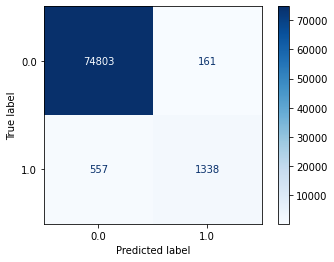

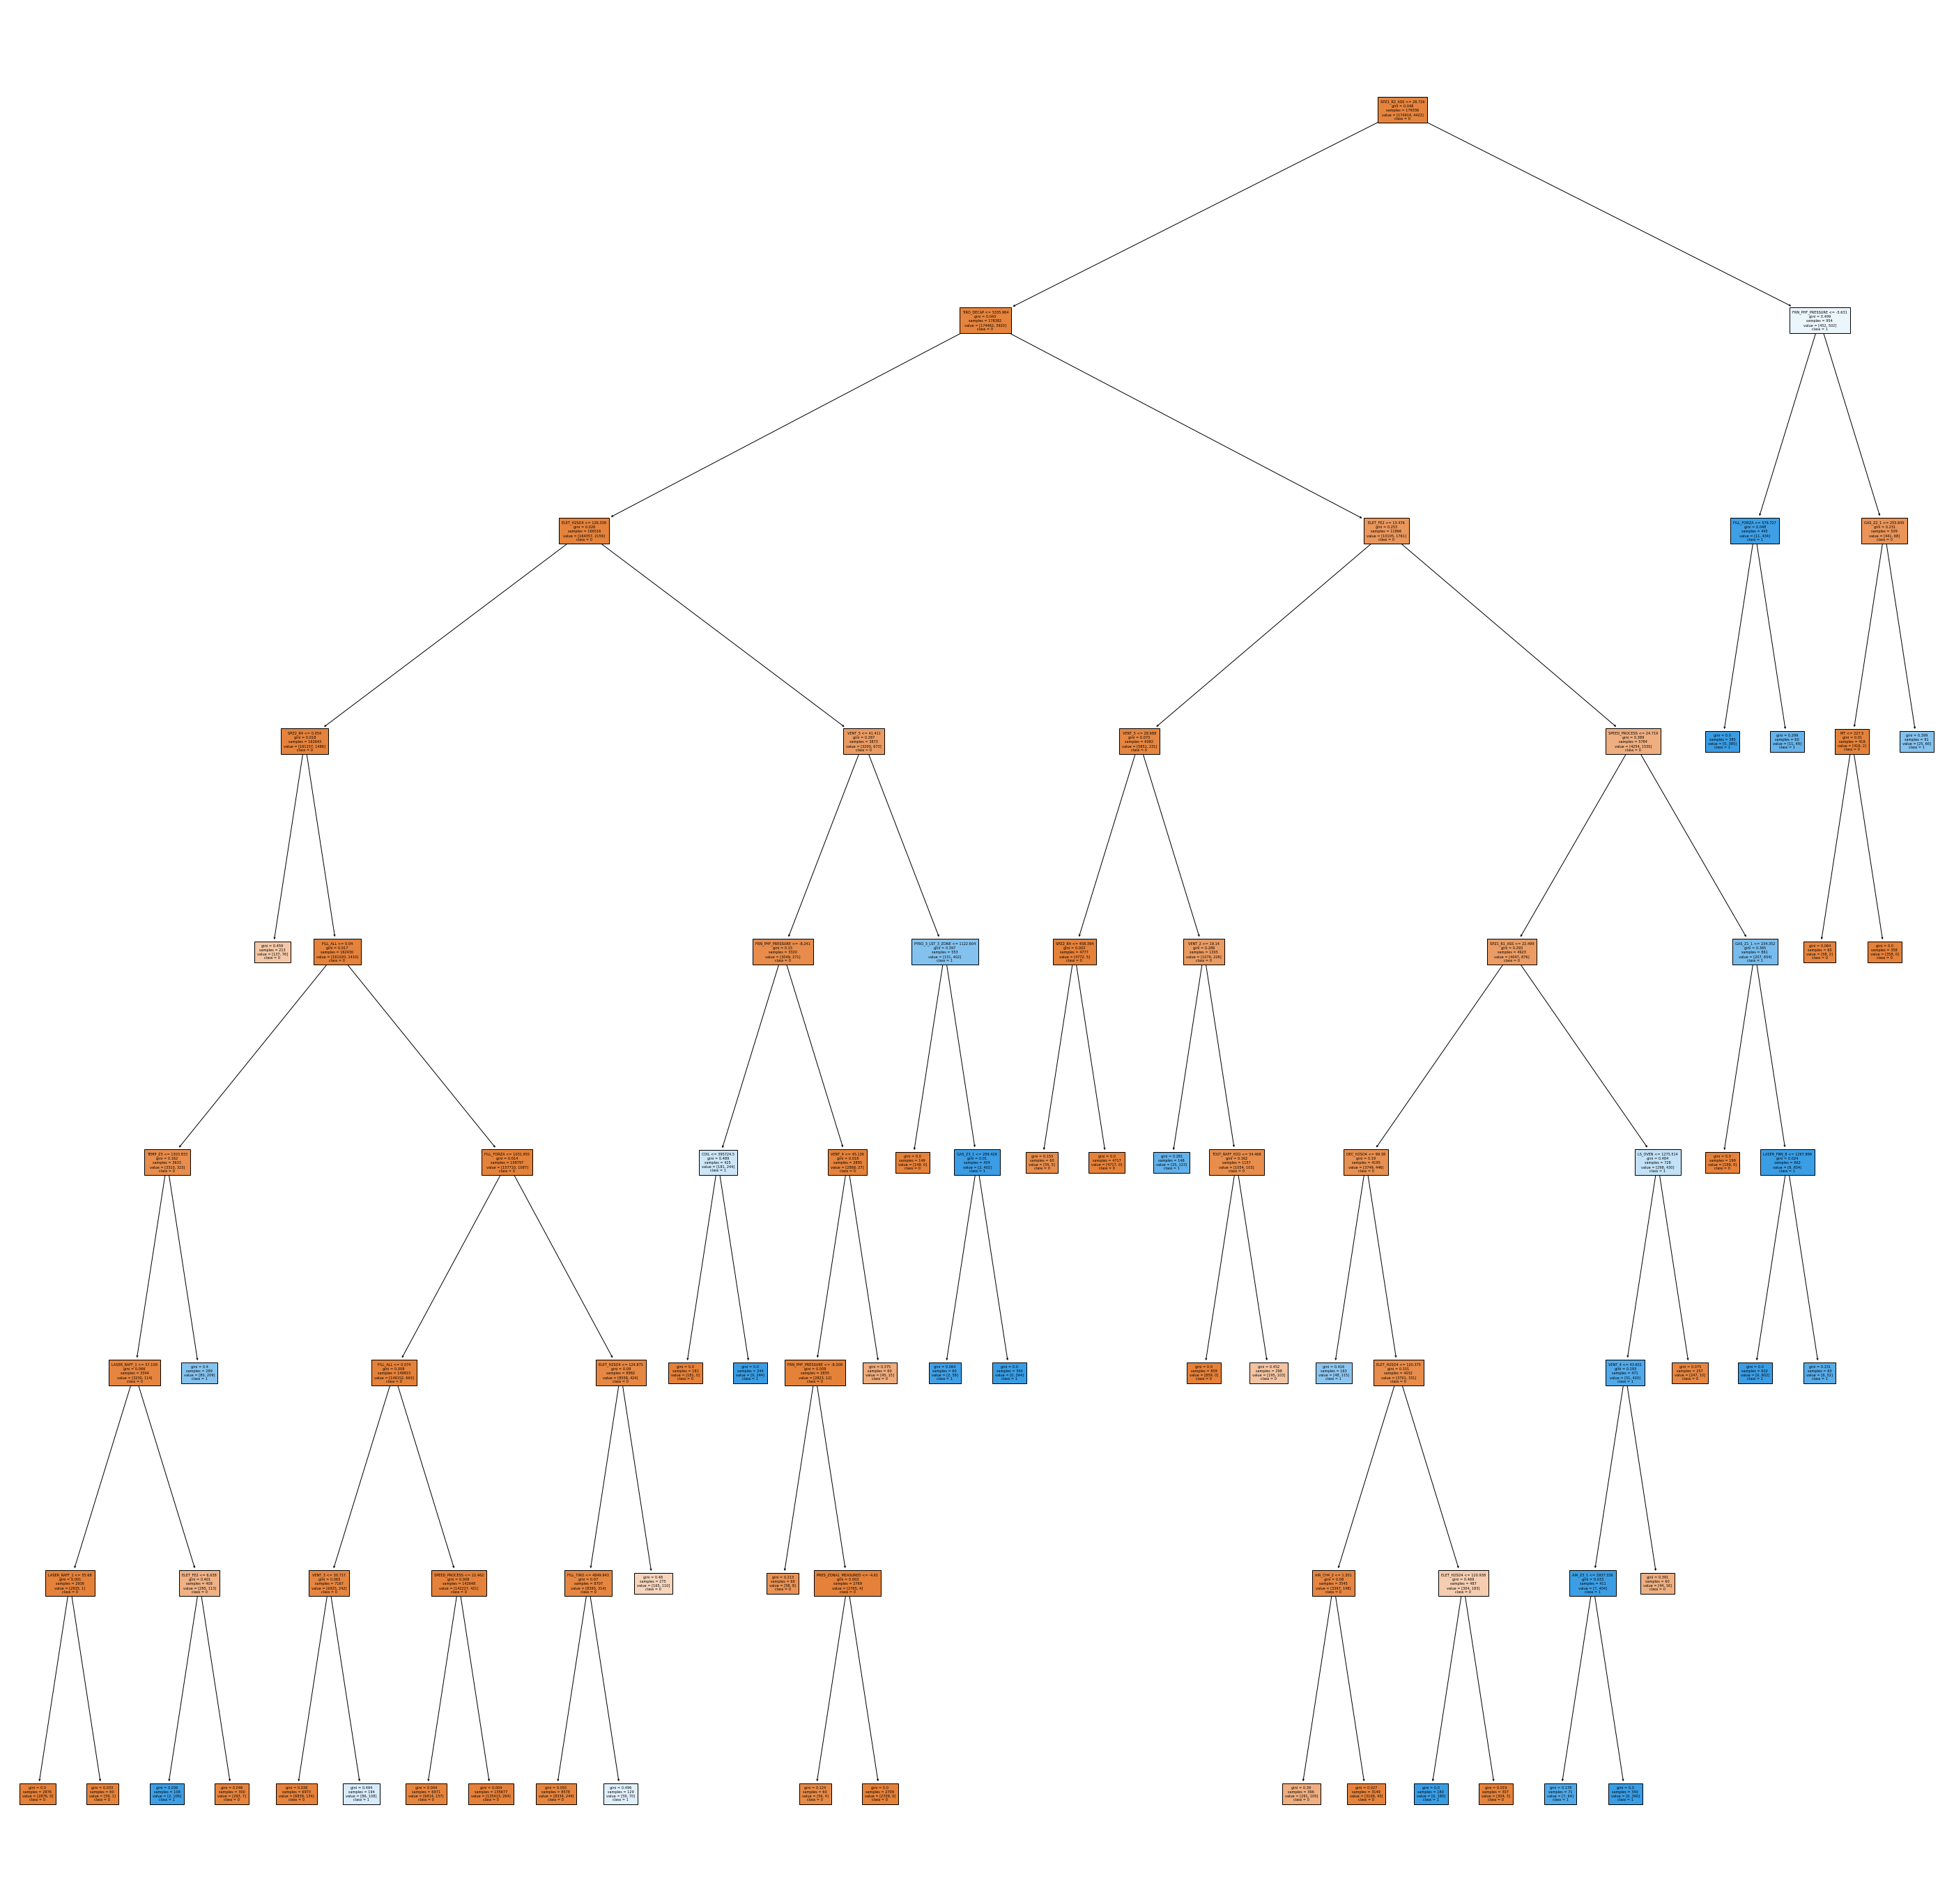


Target column:DIF_TIPO_2
{'min_samples_split': 200, 'max_depth': 8, 'criterion': 'entropy'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     74060
         1.0       0.85      0.78      0.81      2799

    accuracy                           0.99     76859
   macro avg       0.92      0.89      0.90     76859
weighted avg       0.99      0.99      0.99     76859



<Figure size 432x288 with 0 Axes>

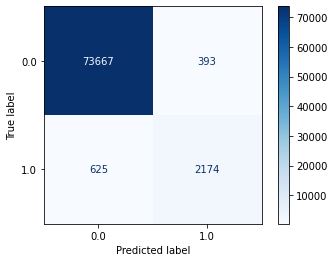

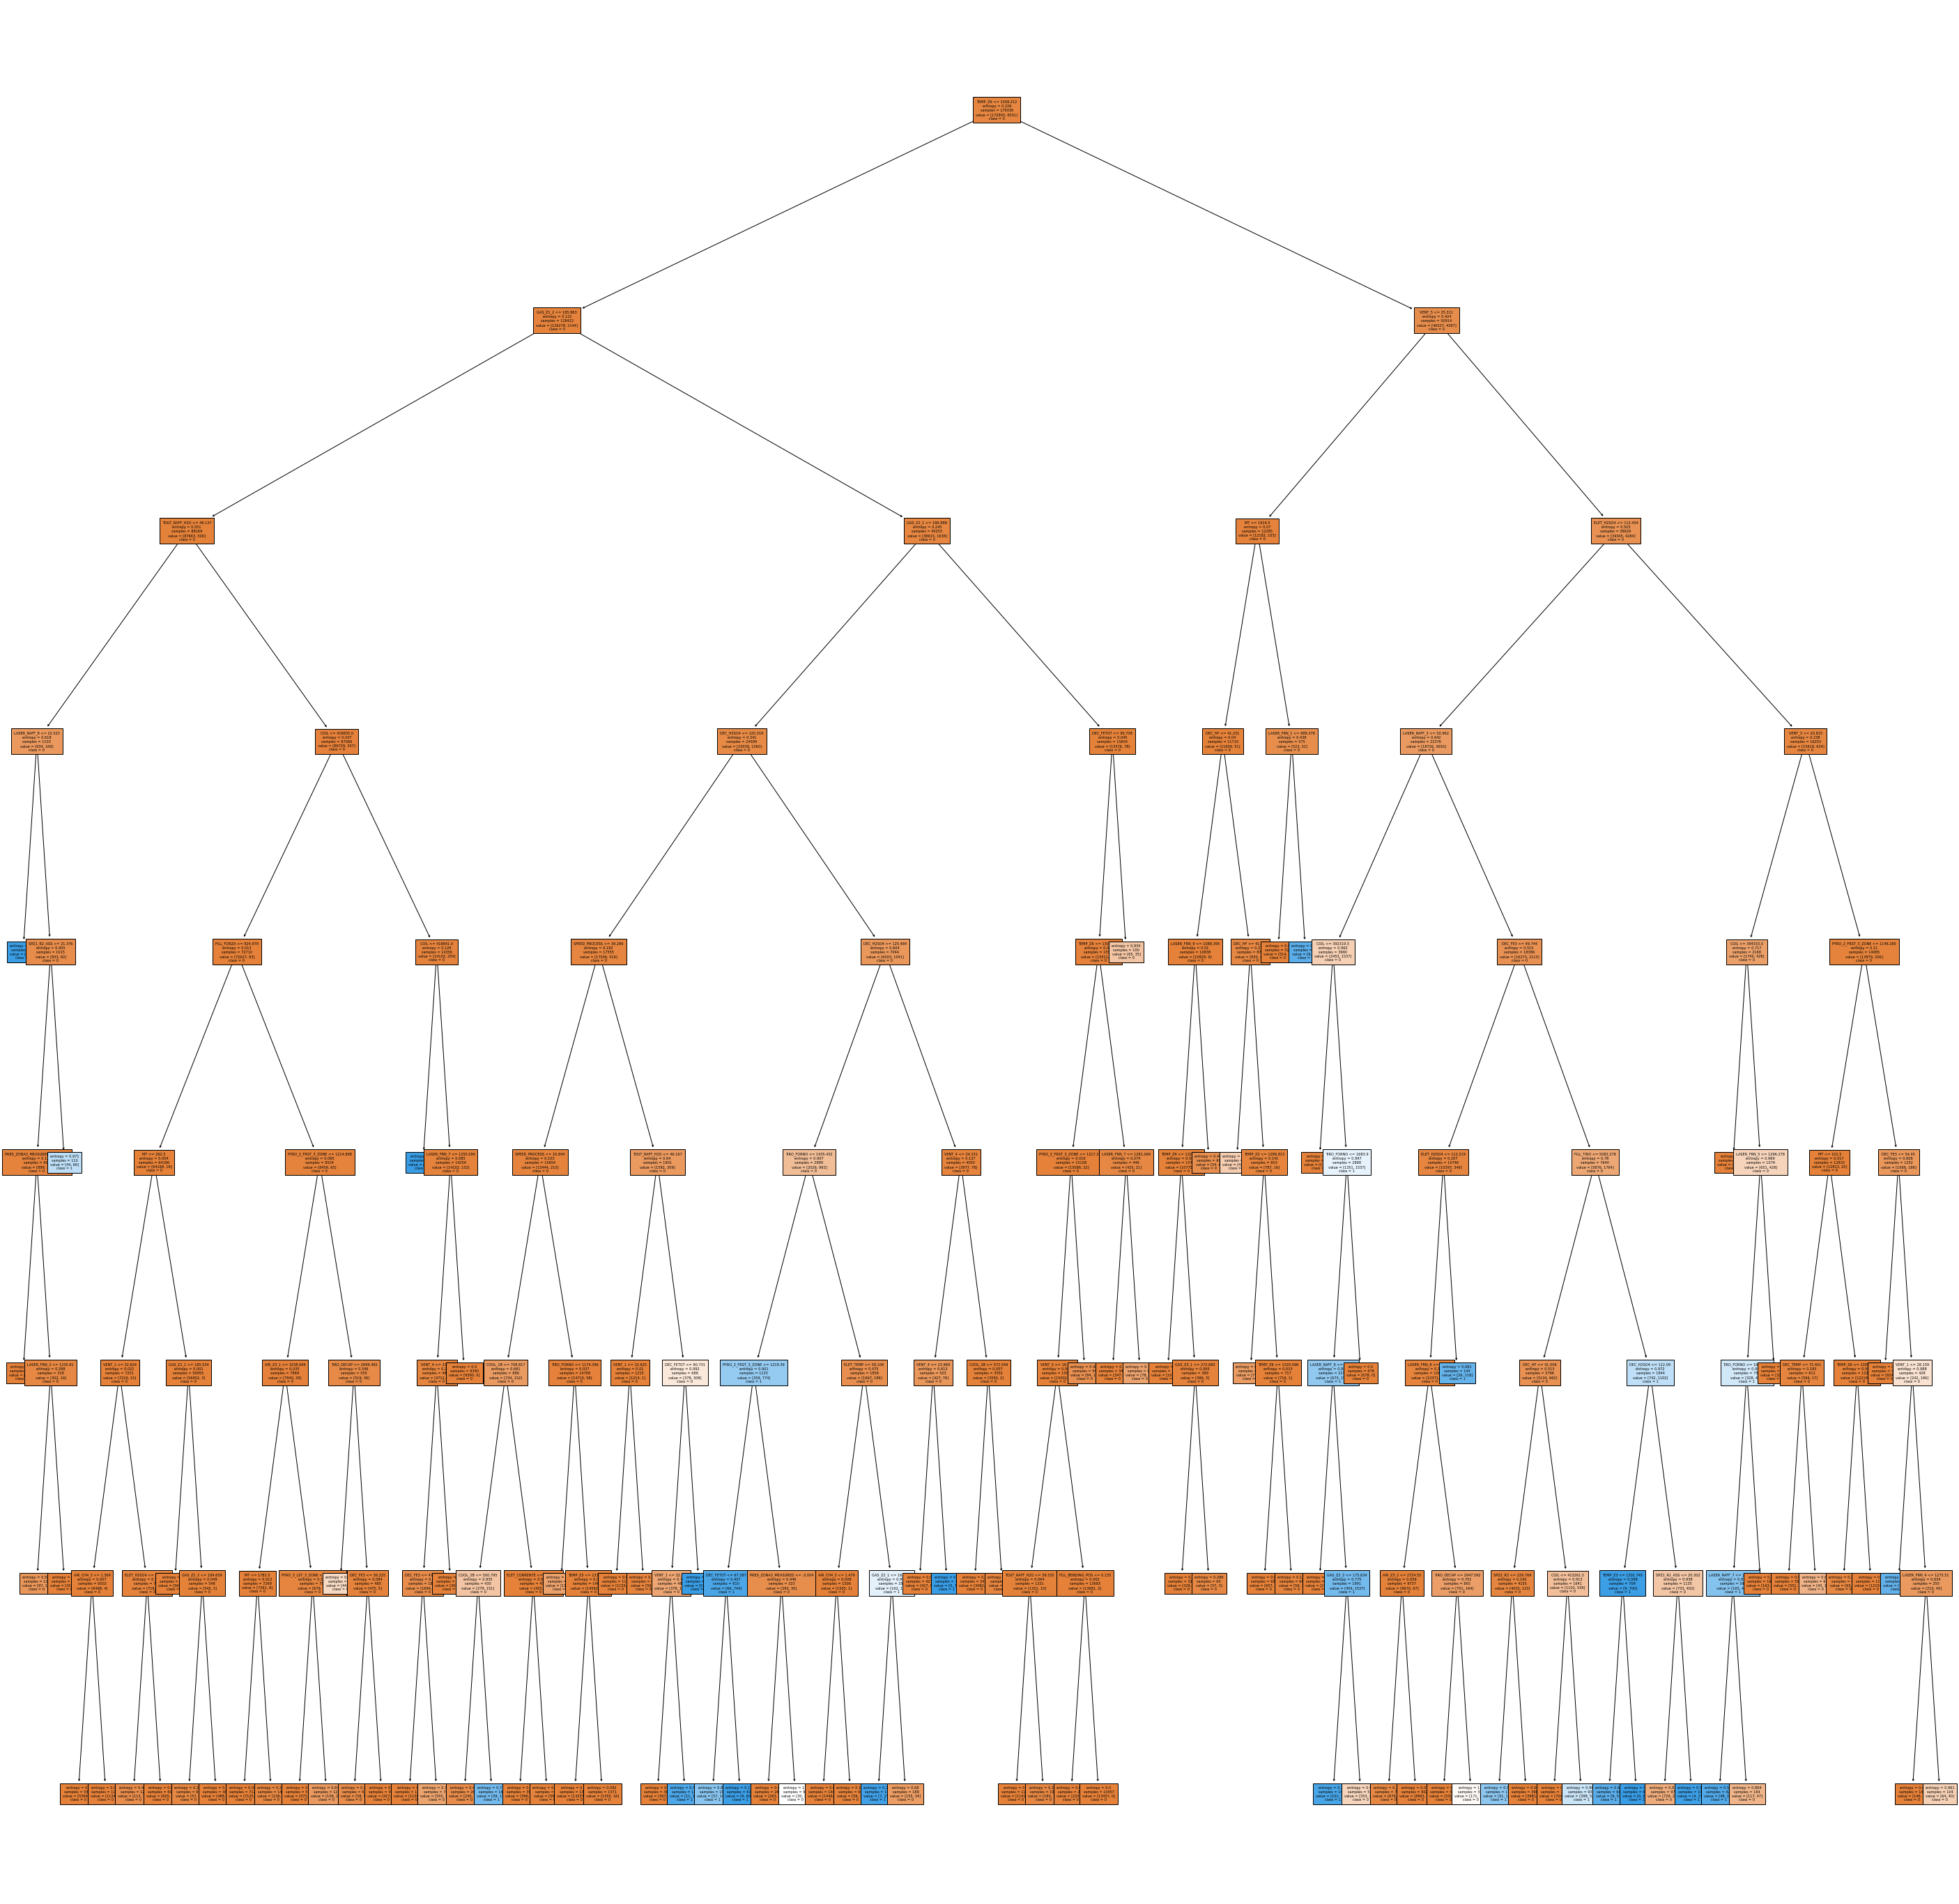


Target column:DIF_TIPO_3
{'min_samples_split': 300, 'max_depth': 8, 'criterion': 'entropy'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     53065
         1.0       0.83      0.86      0.84     23794

    accuracy                           0.90     76859
   macro avg       0.88      0.89      0.88     76859
weighted avg       0.90      0.90      0.90     76859



<Figure size 432x288 with 0 Axes>

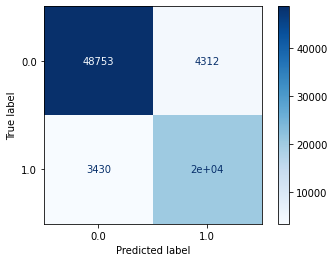

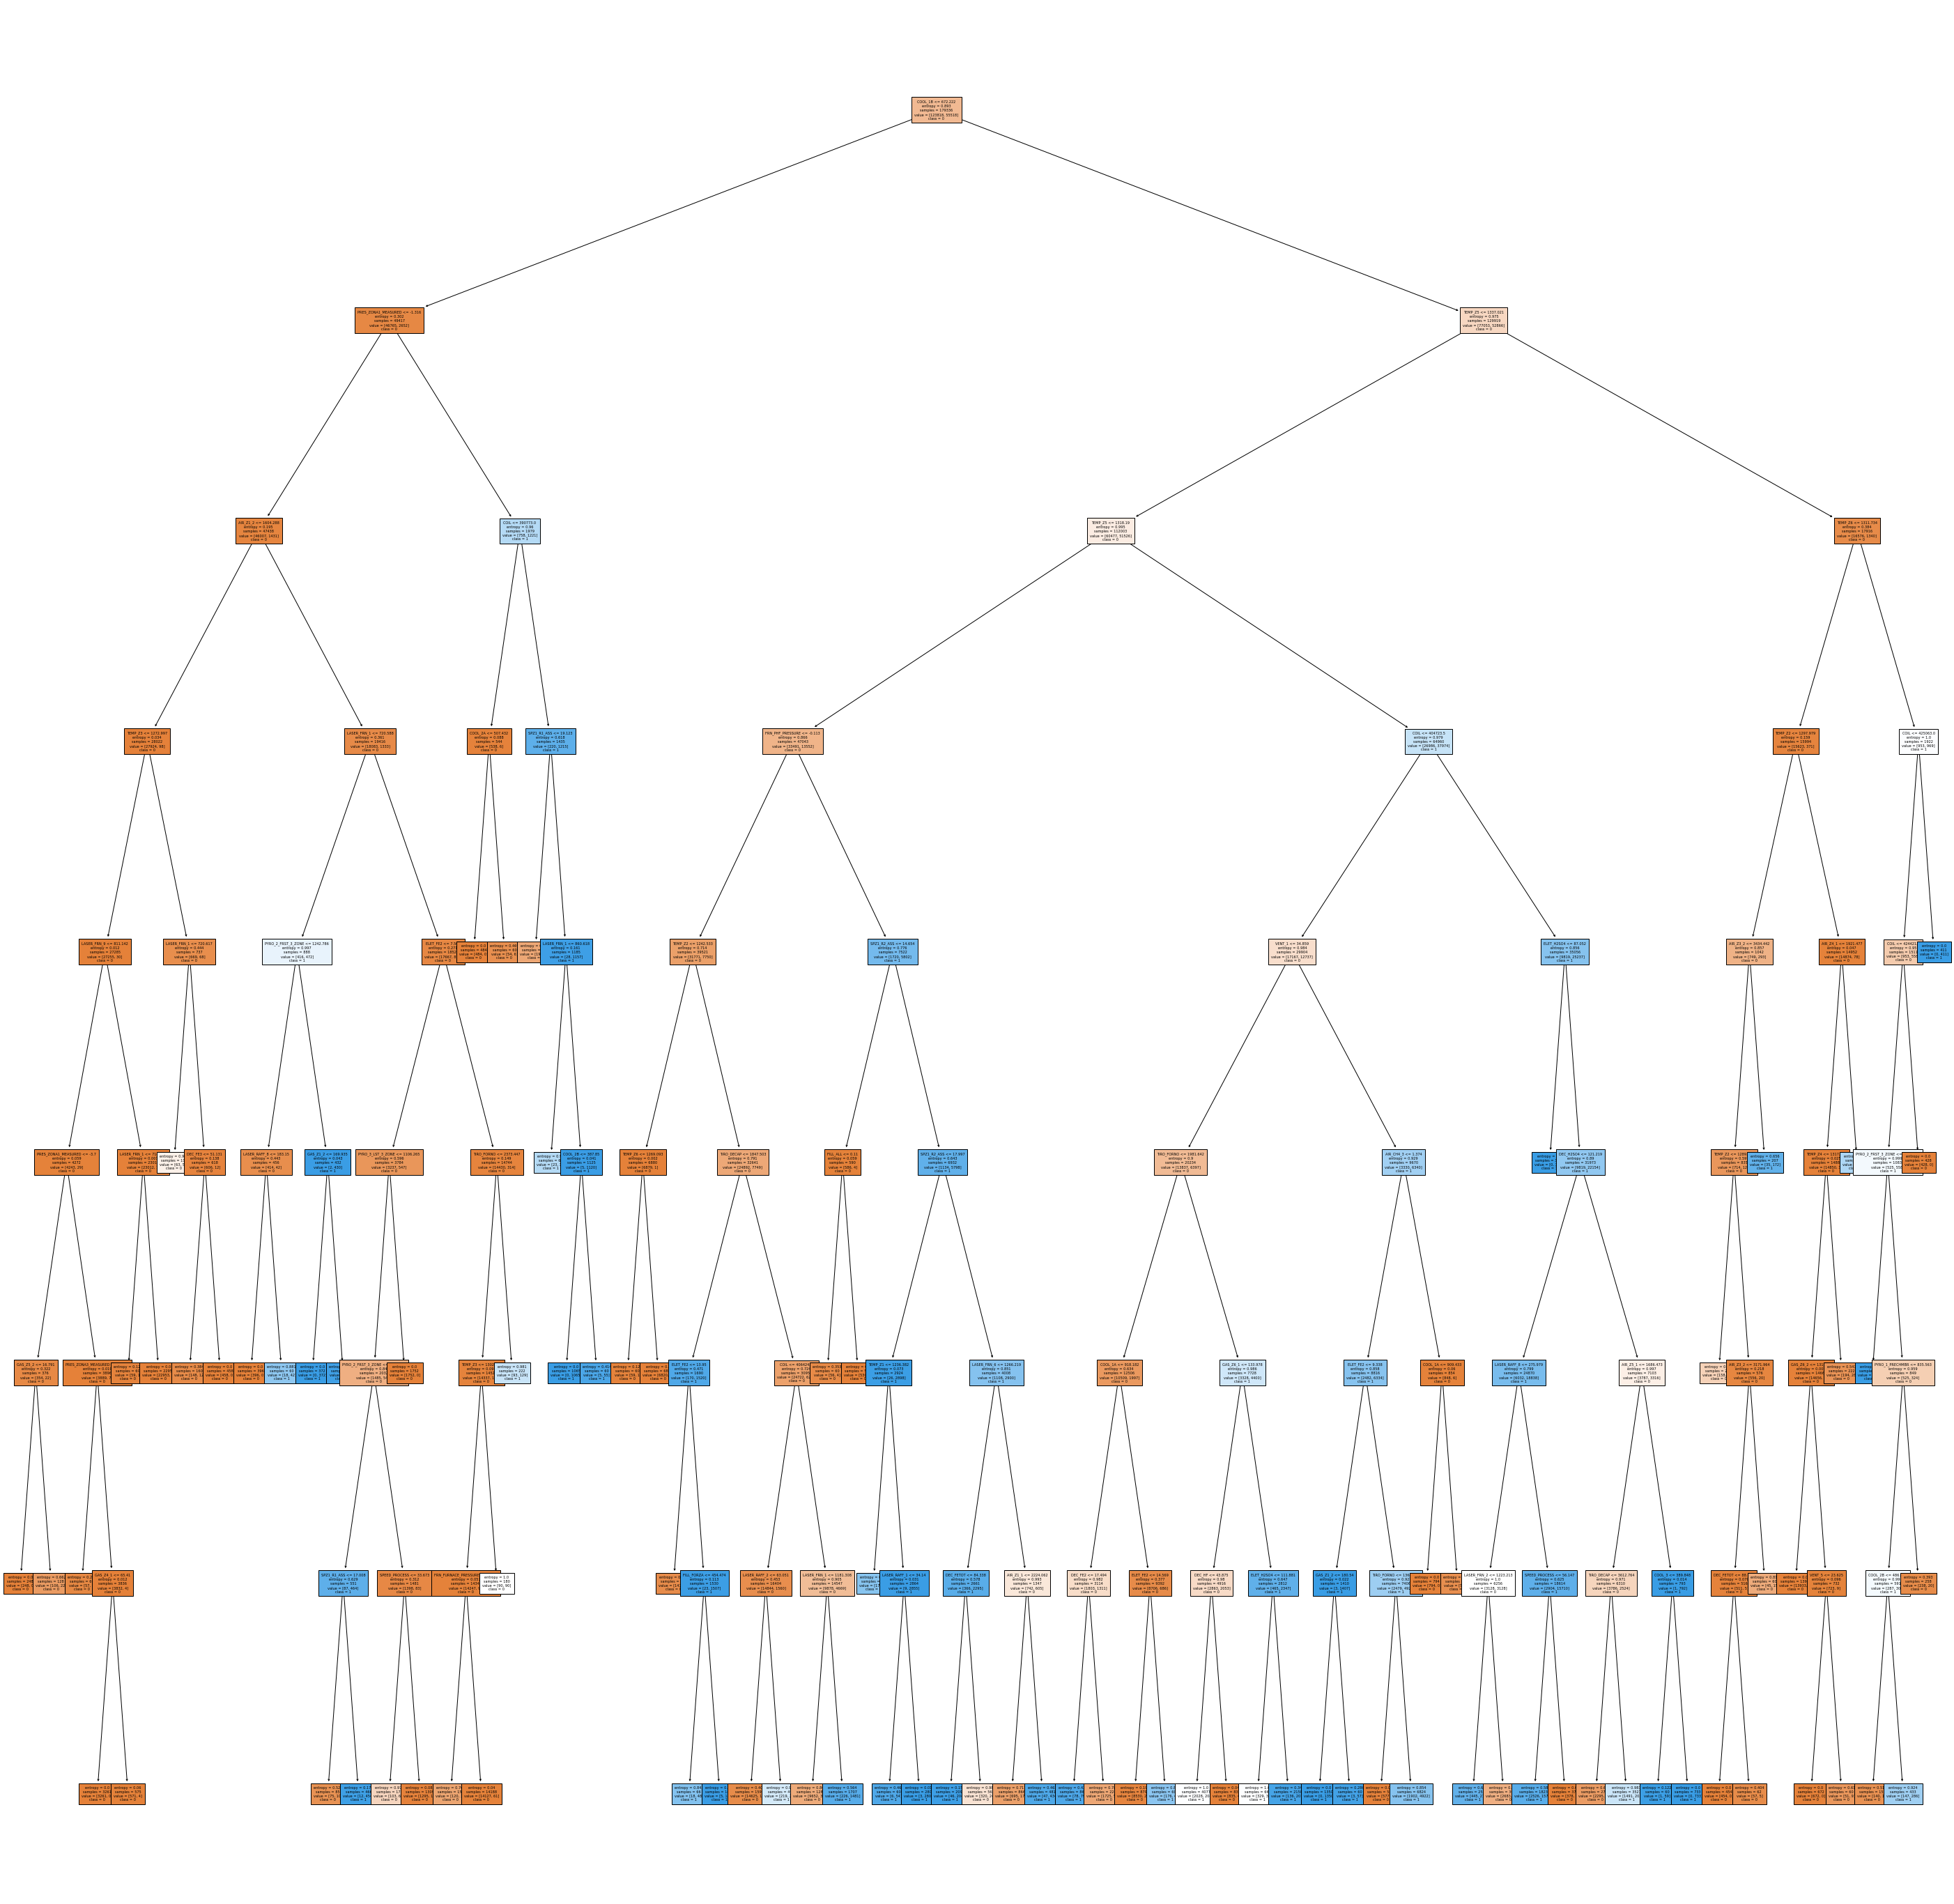


Target column:DIF_TIPO_4
{'min_samples_split': 400, 'max_depth': 7, 'criterion': 'gini'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     62295
         1.0       0.81      0.64      0.71     14564

    accuracy                           0.90     76859
   macro avg       0.86      0.80      0.83     76859
weighted avg       0.90      0.90      0.90     76859



<Figure size 432x288 with 0 Axes>

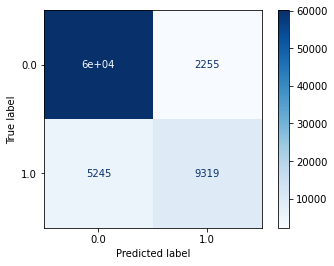

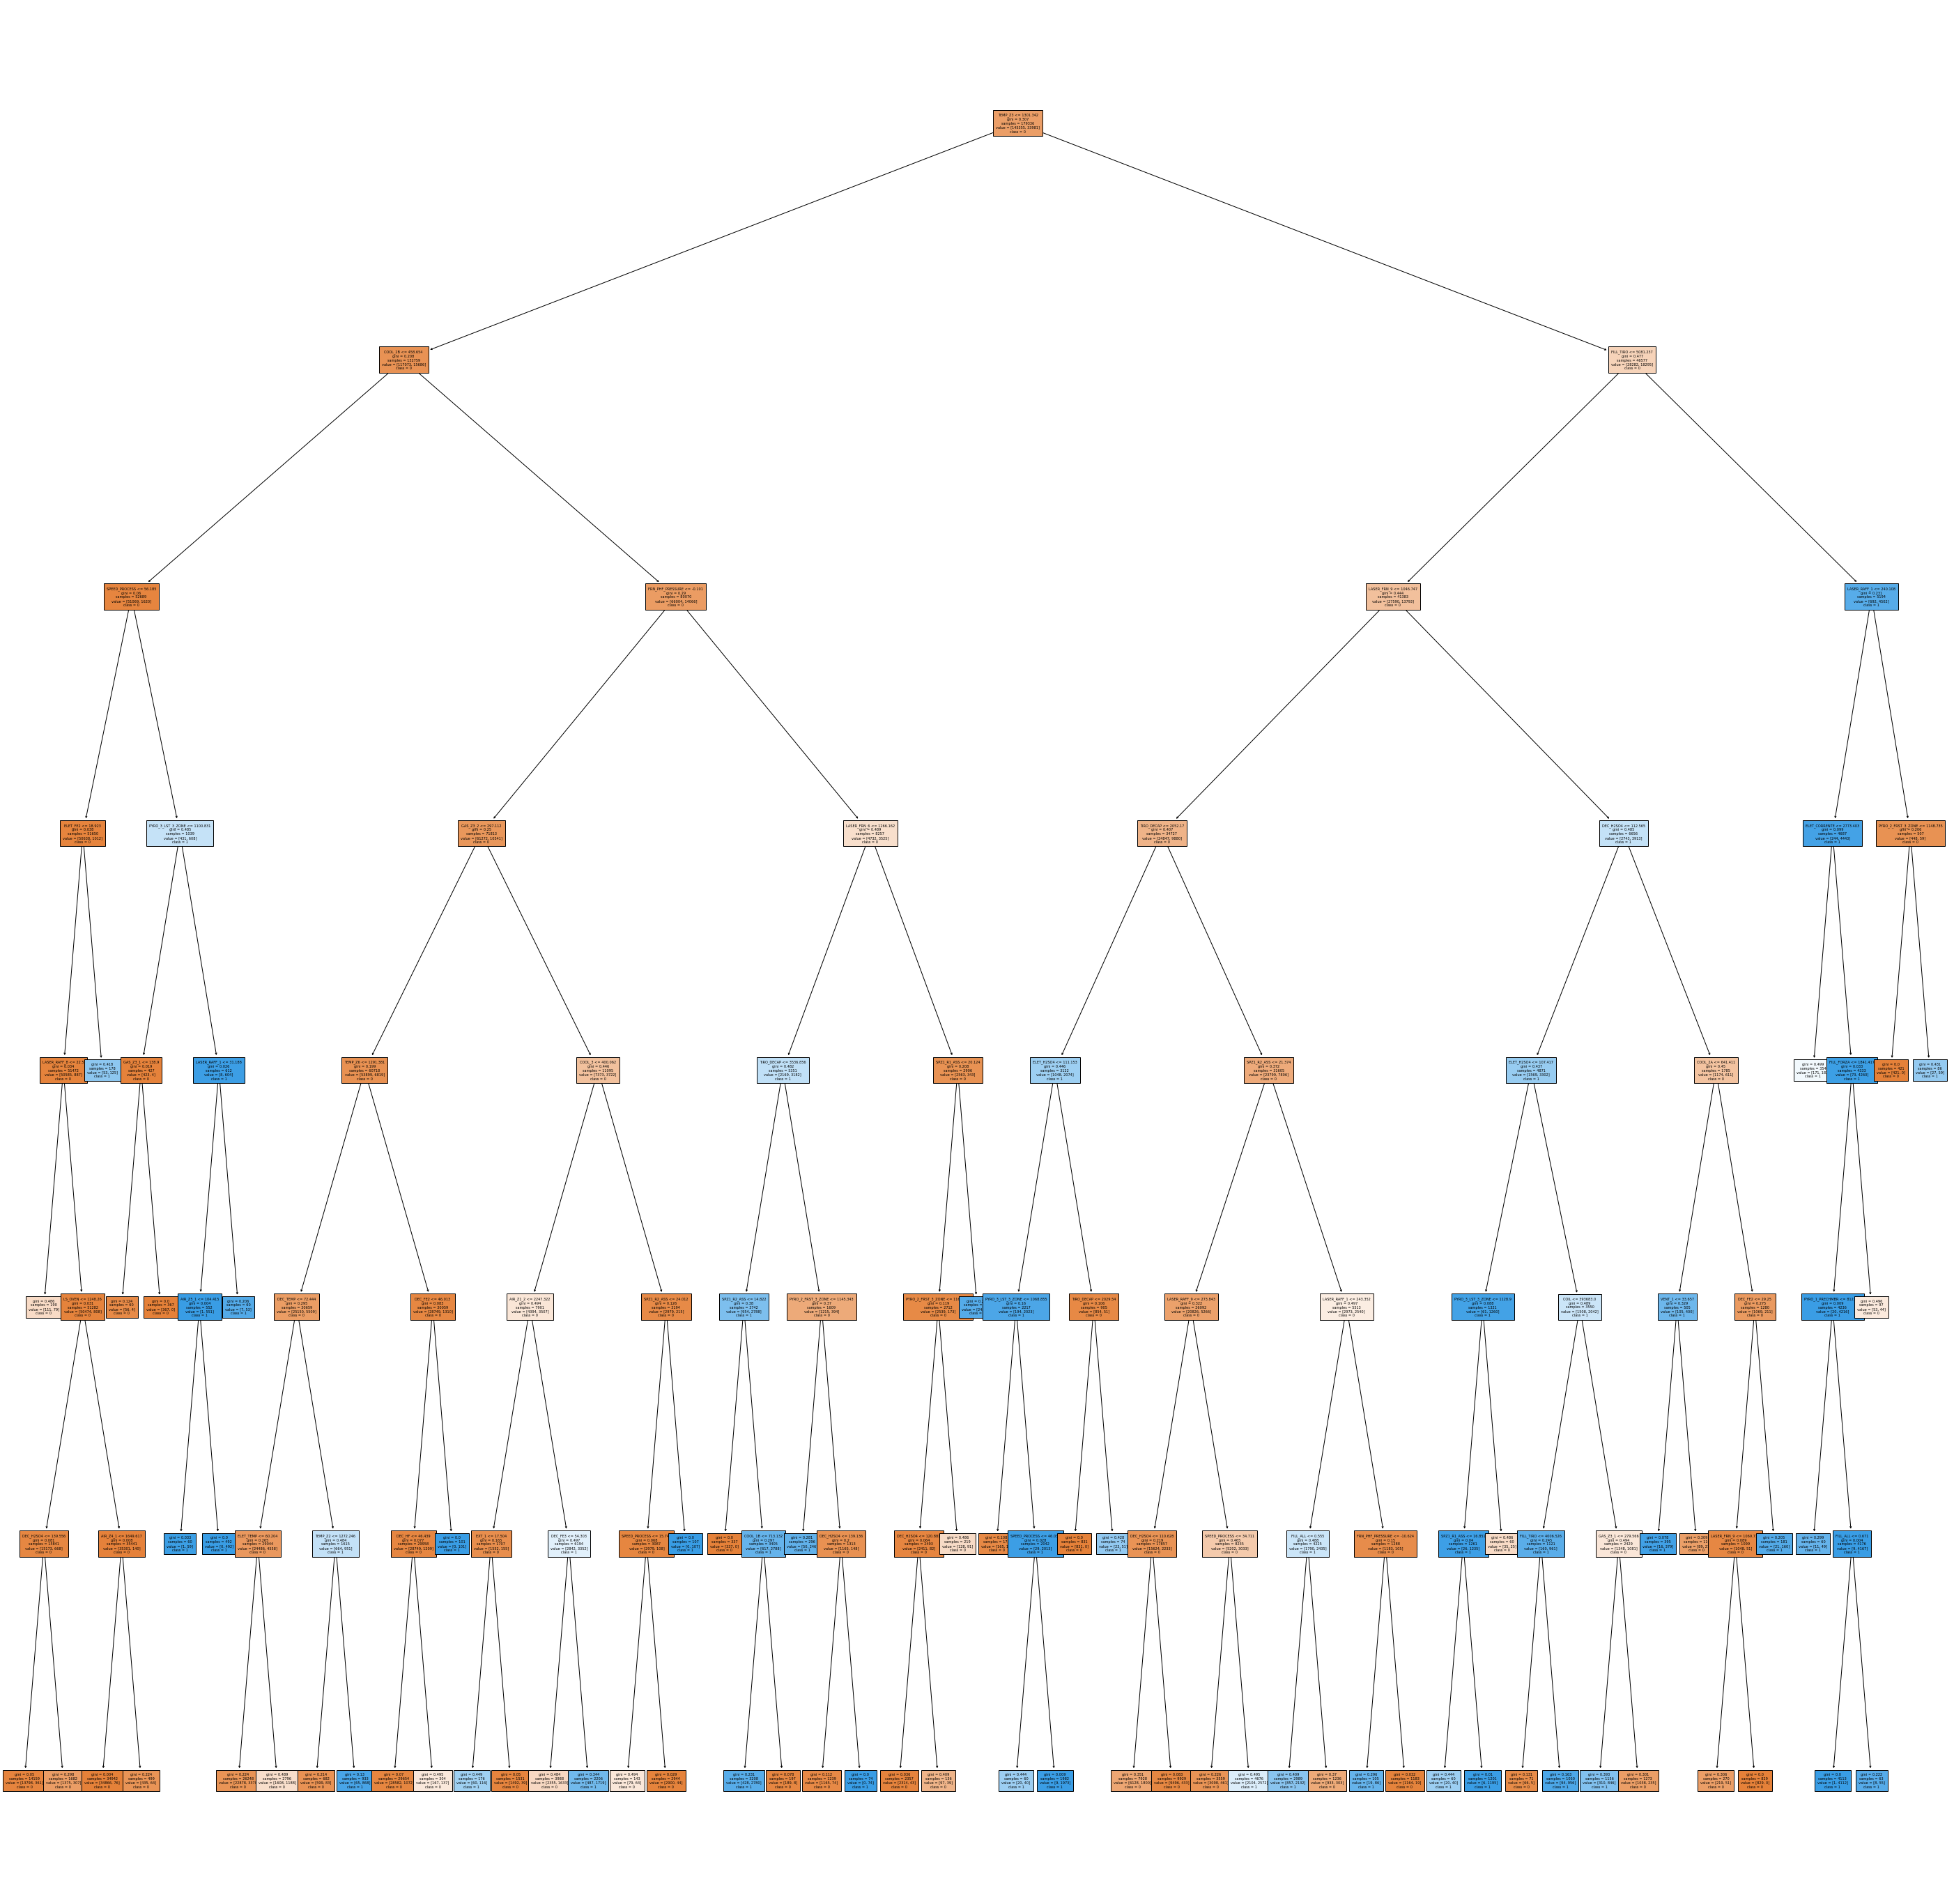


Target column:DIF_TIPO_5
{'min_samples_split': 100, 'max_depth': 6, 'criterion': 'entropy'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     74862
         1.0       0.87      0.53      0.66      1997

    accuracy                           0.99     76859
   macro avg       0.93      0.77      0.83     76859
weighted avg       0.98      0.99      0.98     76859



<Figure size 432x288 with 0 Axes>

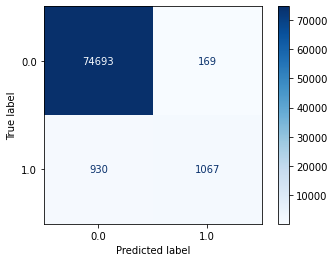

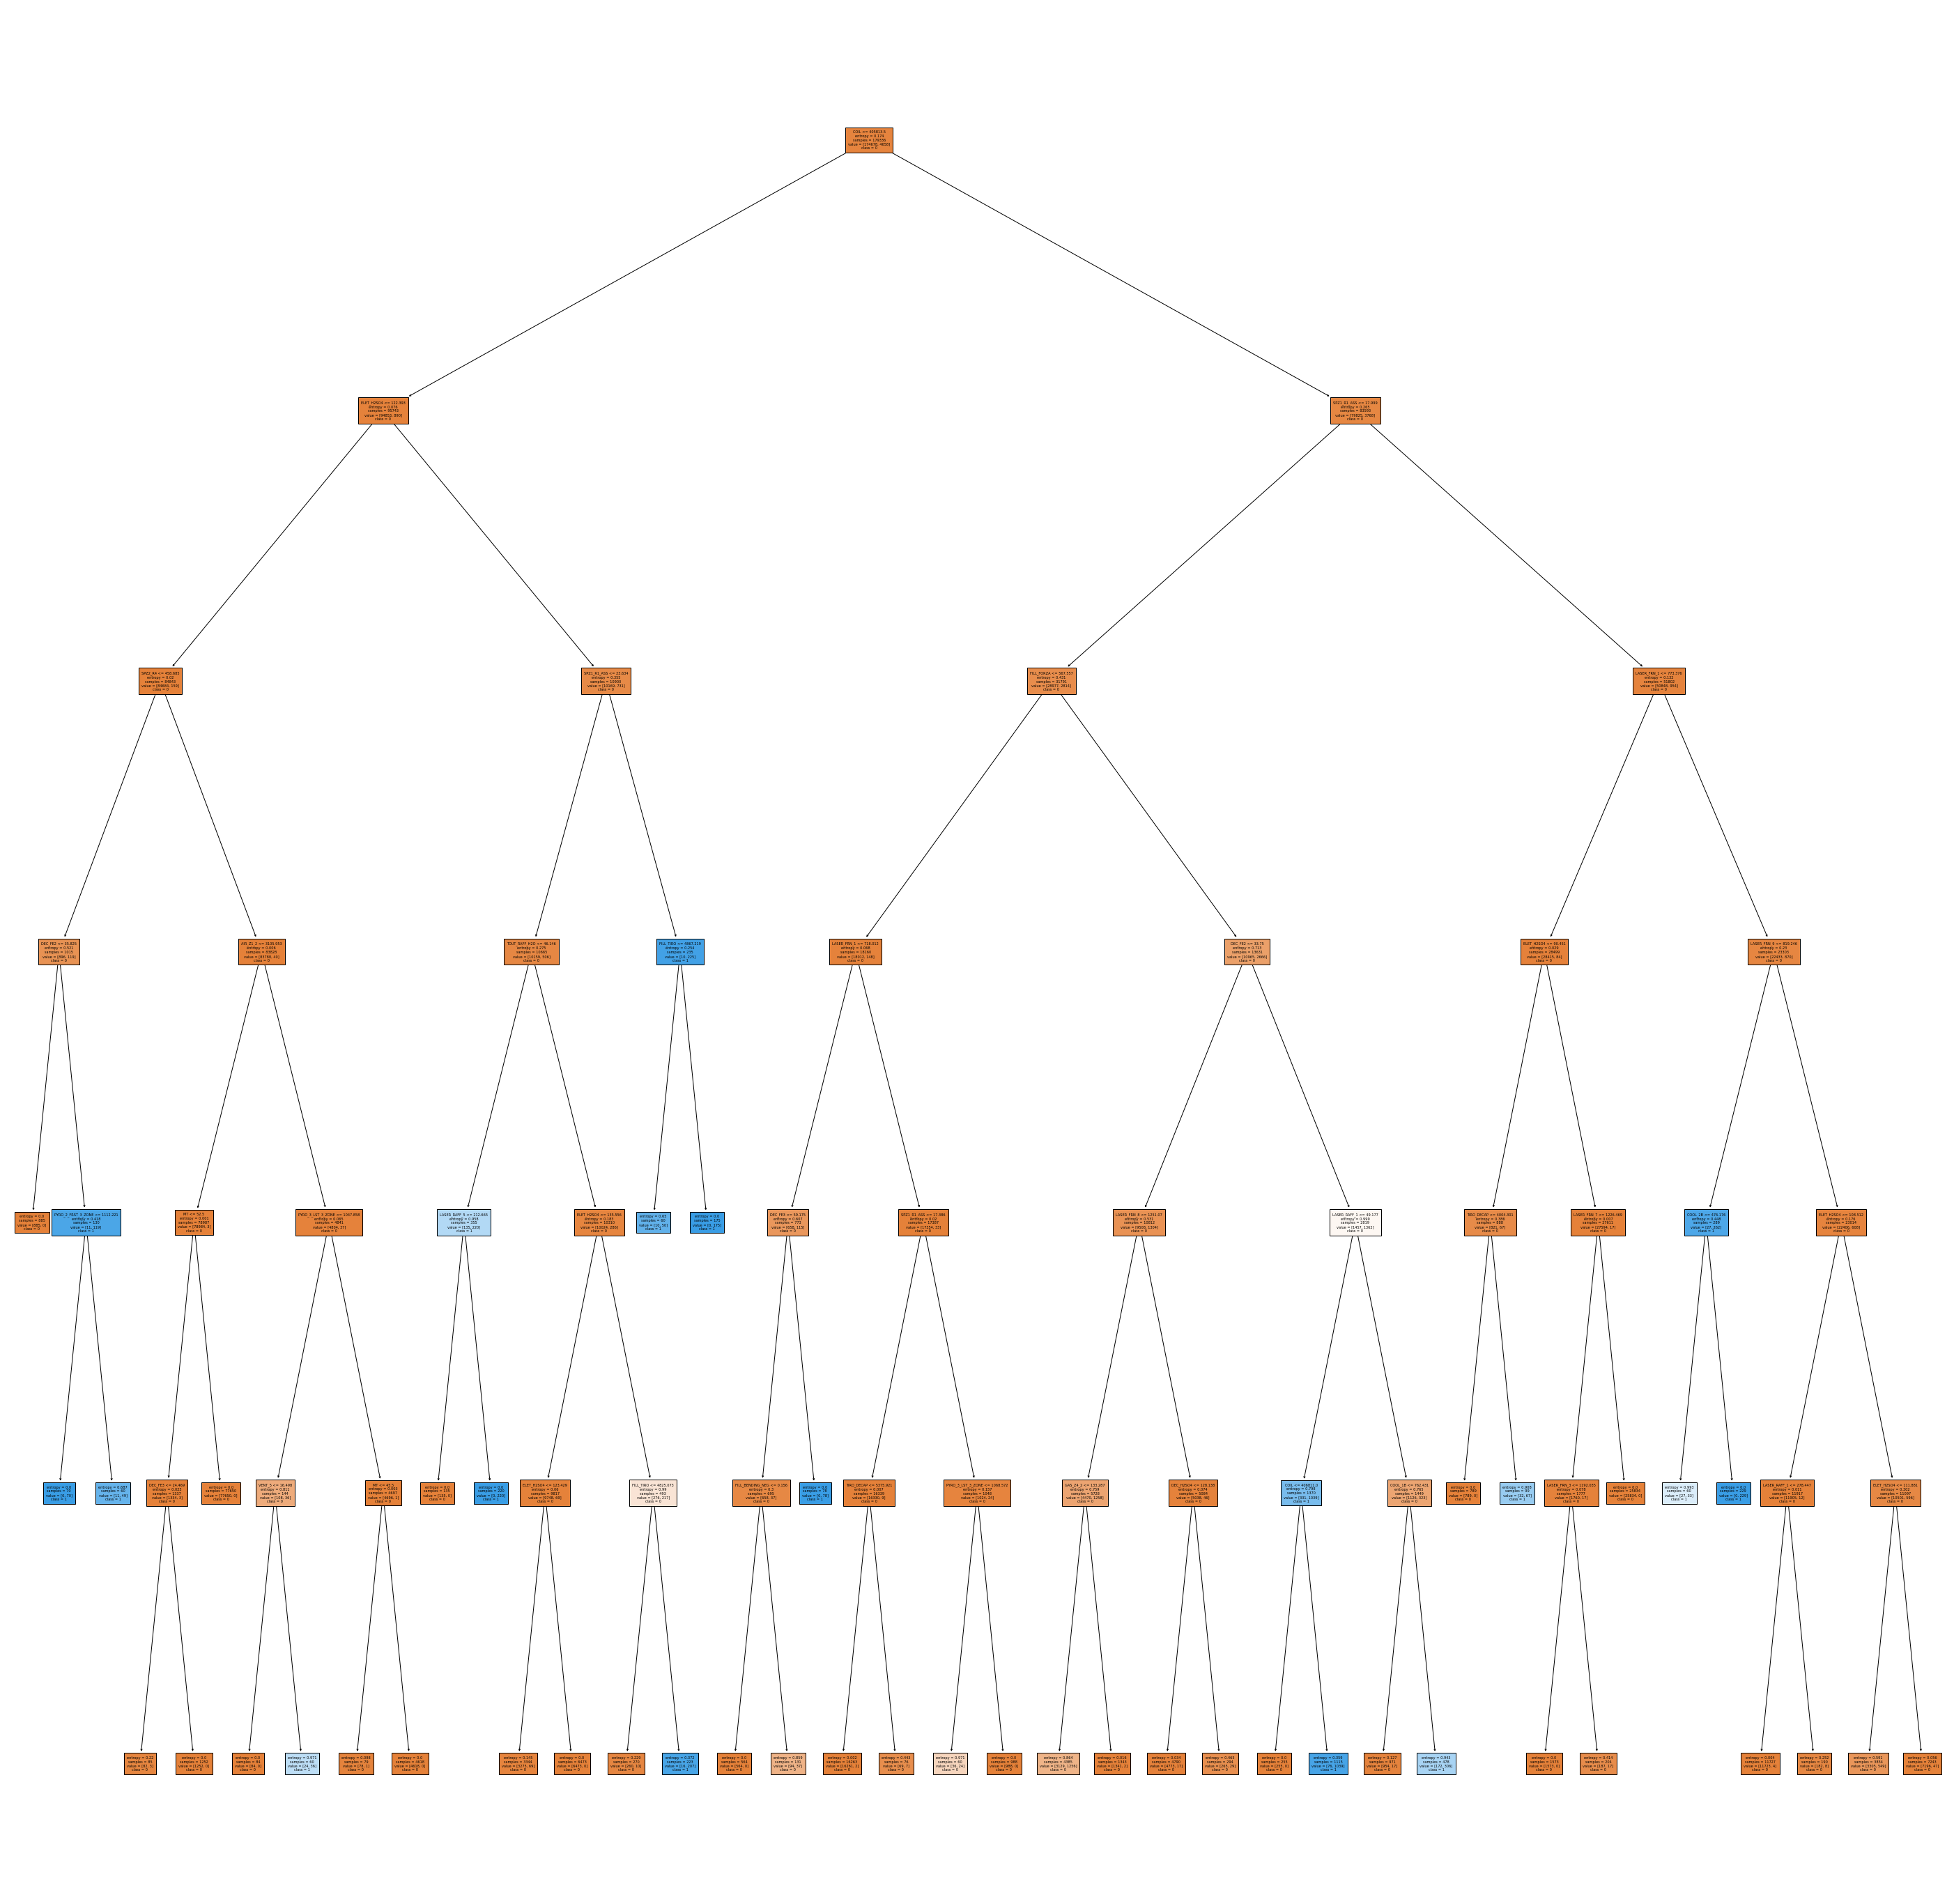


Target column:DIF_TIPO_6
{'min_samples_split': 200, 'max_depth': 8, 'criterion': 'gini'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     74820
         1.0       0.96      0.91      0.93      2039

    accuracy                           1.00     76859
   macro avg       0.98      0.95      0.97     76859
weighted avg       1.00      1.00      1.00     76859



<Figure size 432x288 with 0 Axes>

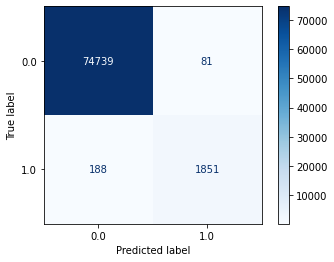

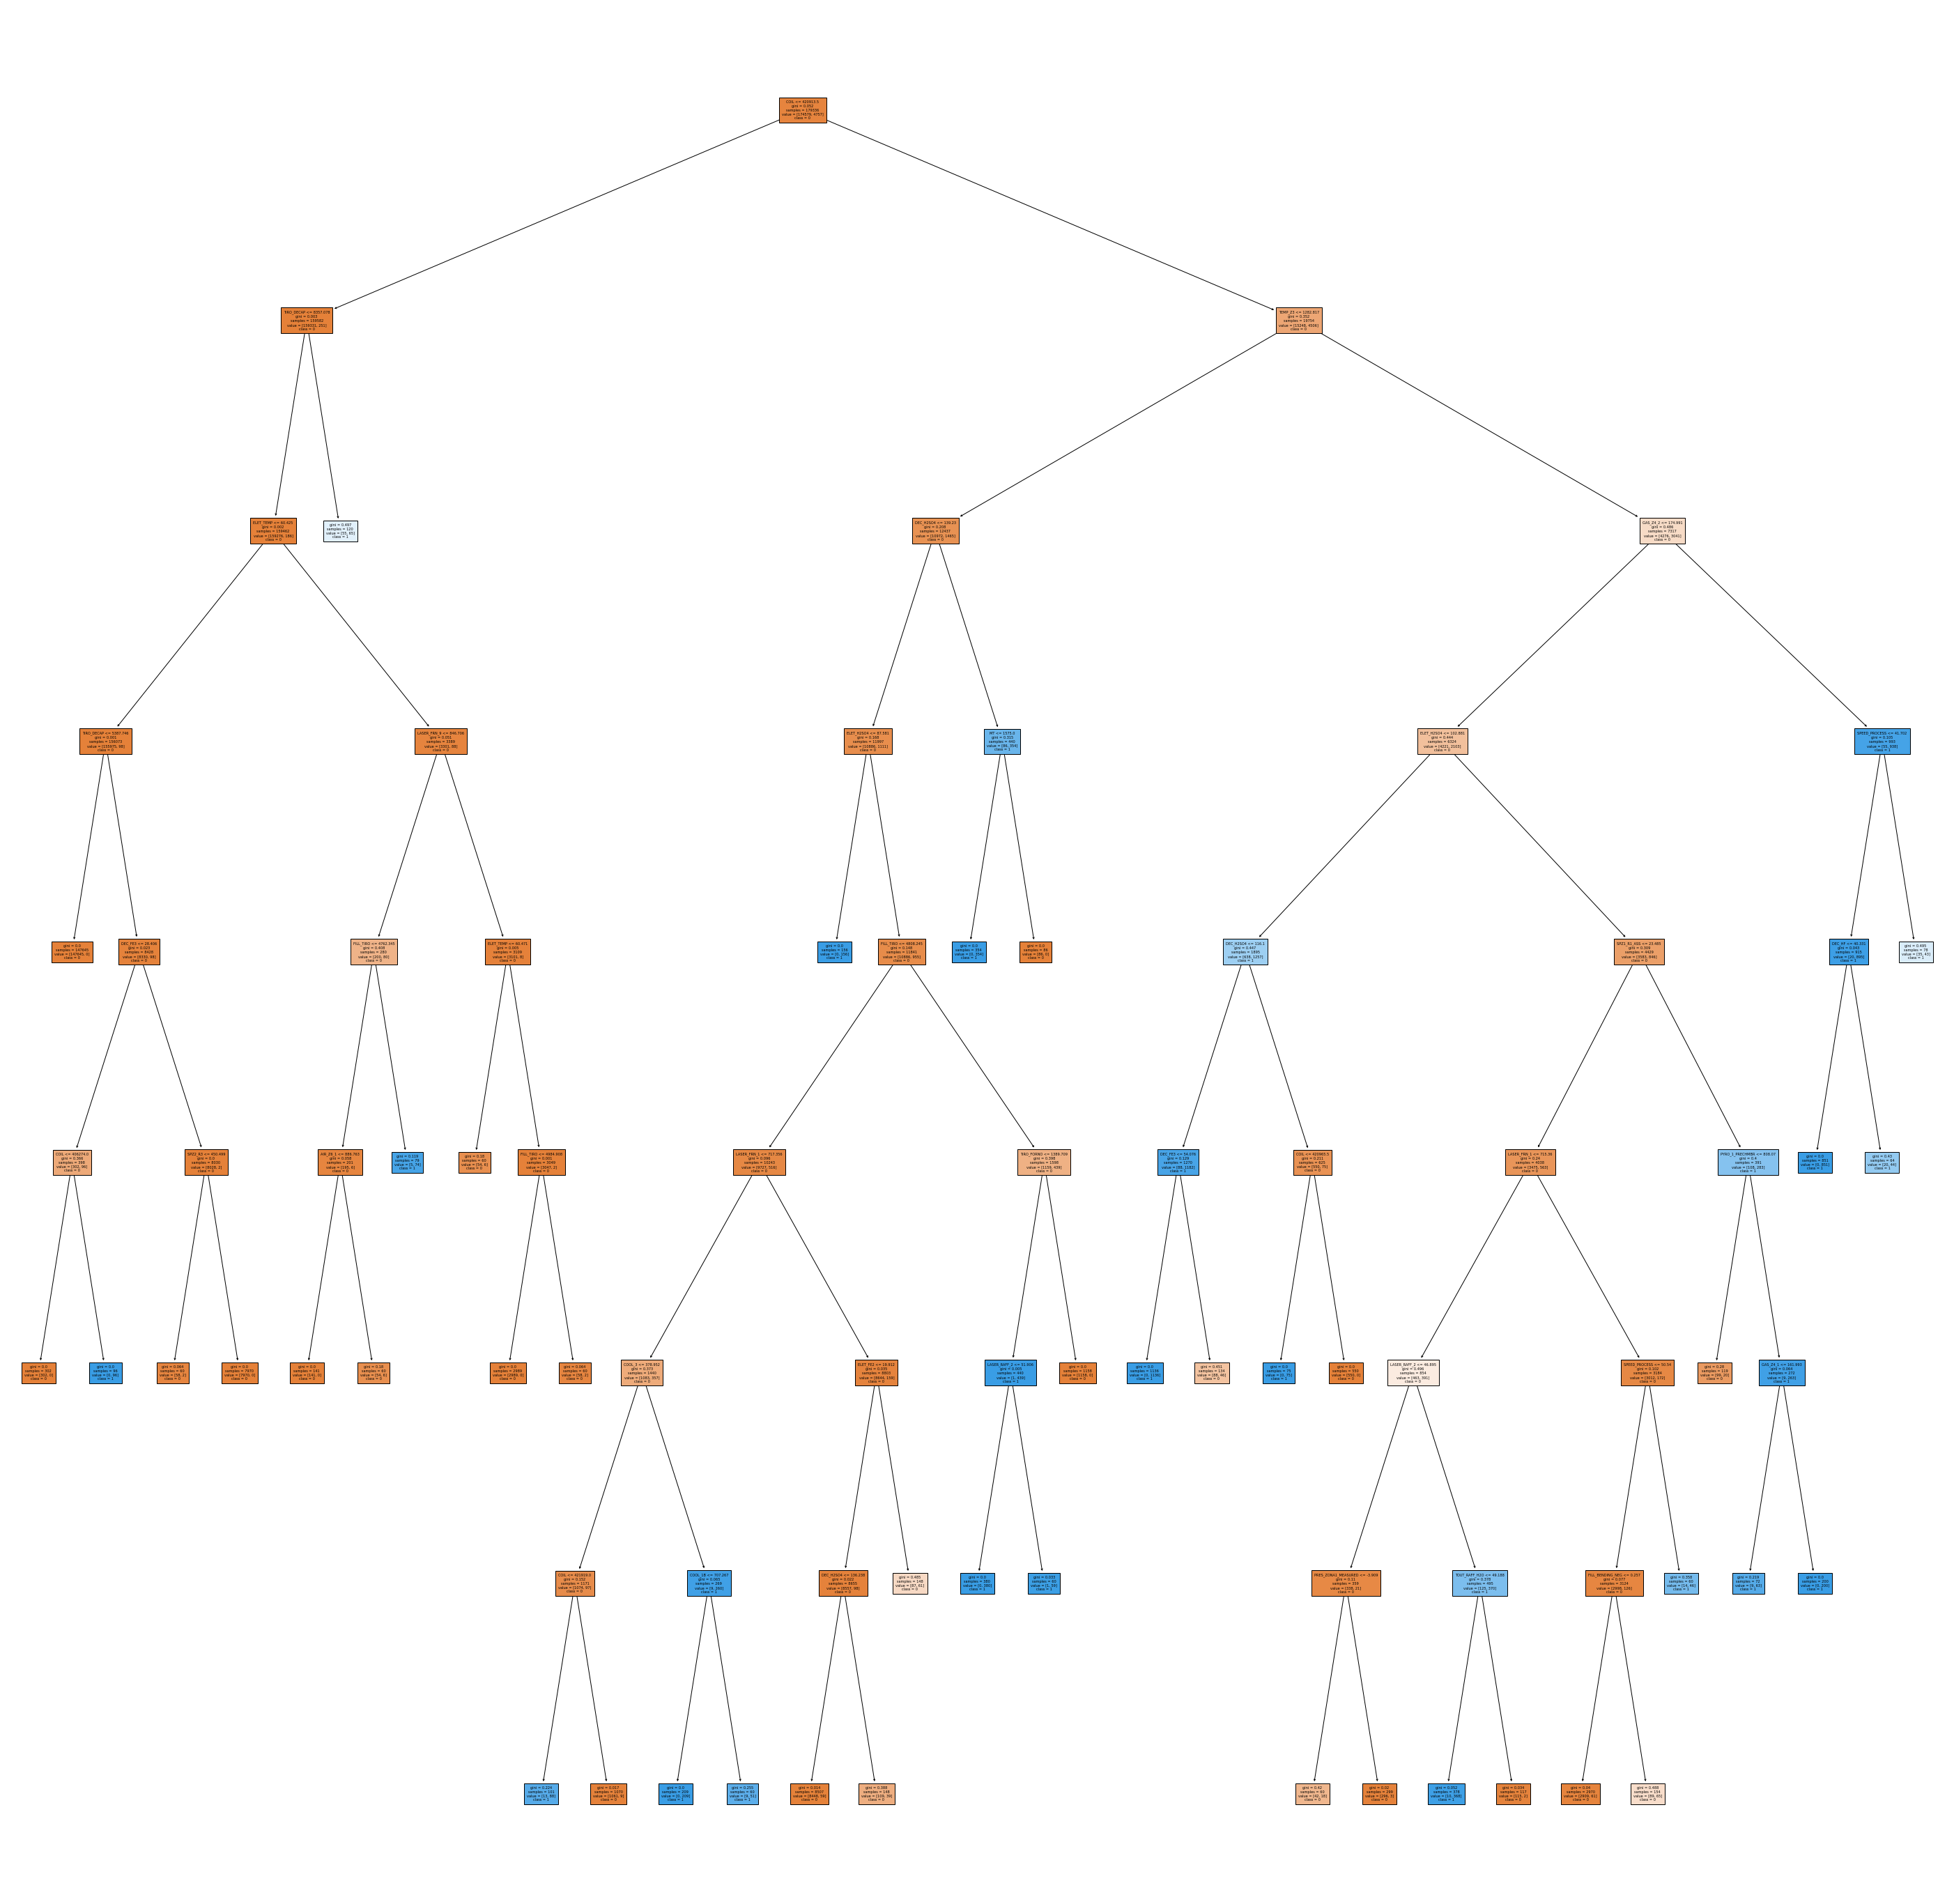

{'DIF_TIPO_1': DecisionTreeClassifier(max_depth=8, min_samples_leaf=60, min_samples_split=300),
 'DIF_TIPO_2': DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=60,
                        min_samples_split=200),
 'DIF_TIPO_3': DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=60,
                        min_samples_split=300),
 'DIF_TIPO_4': DecisionTreeClassifier(max_depth=7, min_samples_leaf=60, min_samples_split=400),
 'DIF_TIPO_5': DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=60,
                        min_samples_split=100),
 'DIF_TIPO_6': DecisionTreeClassifier(max_depth=8, min_samples_leaf=60, min_samples_split=200)}

<Figure size 432x288 with 0 Axes>

In [81]:
pred_all(new_df)

<AxesSubplot:>

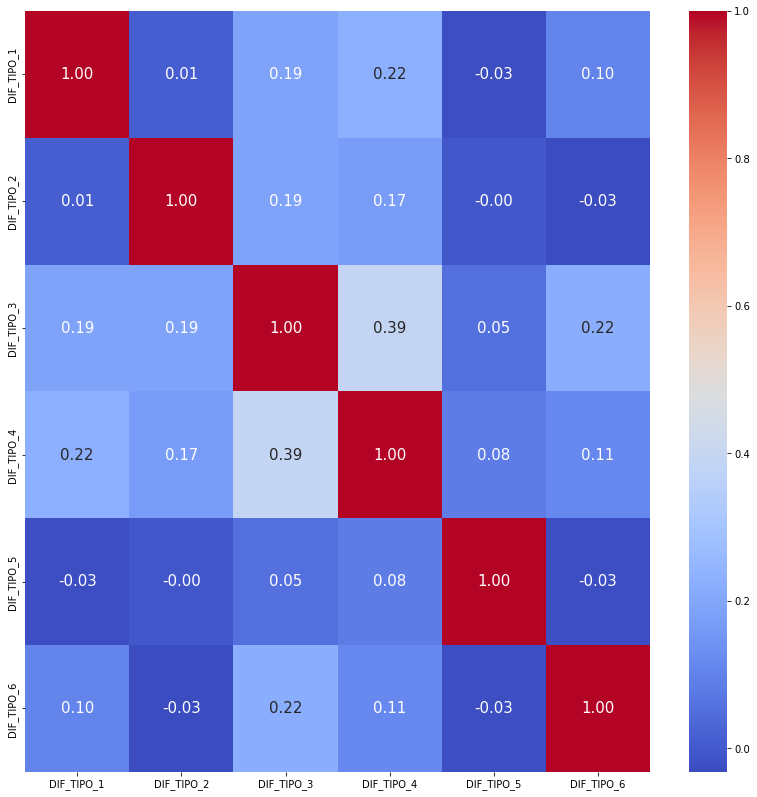

In [82]:
targets = new_df[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5',
       'DIF_TIPO_6']]
plt.figure(figsize=(14, 14))
sns.heatmap(targets.corr(), cmap=sns.color_palette("coolwarm", as_cmap=True), annot=True, fmt= '.2f',annot_kws={'size': 15})